# Quantum Channel Approach
The idea is to subject a arbitrary initial density matrix $\rho_0$ to a quantum channel defined as :

$$ \mathcal{E}(\rho) = \sum_a E_a \rho E_a^\dagger = \rho_f$$ 

Here, $E_a$ are the Krauss operators for the channel. 

We postualte the heat created by the channel $\Delta Q$ is equal to the Landauer bound $\Delta Q = \beta \Delta S$, where $\beta$ is the inverse temperature and $\Delta S = S(\rho_f) - S(\rho_i)$ is change in von Neumann entropy.

The fidelity between the states $\rho_0$ and $\rho_f$ is given as $F(\rho_0,\rho_f) = Tr[\sqrt{\sqrt{\rho_0}  \rho_f \sqrt{\rho_0}}]$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import qutip as qtp

## Dephasing Channel

In [86]:
def dephasing_channel_op(alpha):
    '''
    The dephasing channel has two Krauss operators parametrized by alpha which are:
        E_1 = sqrt(alpha) (1 0 \\ 0 1)
        E_2 = sqrt(1-alpha) (1 0 \\ 0 -1)
    alpha is required to be between 0 and 1 (both inclusive).
    This function returns these two operators as a list.
    '''
    return [np.sqrt(alpha)*qtp.qeye(2),np.sqrt(1-alpha)*qtp.sigmaz()]

def apply_channel(rho,channel_func,channel_params):
    '''
        Returns the density matrix after applying the quantum channel to rho passed as the argument.
    '''
    kraus_op = channel_func(*channel_params)
    res_list = [x * rho * x.dag() for x in kraus_op]
    res = sum(res_list)
    return res

def calc_entropy_diff(rho1,rho2):
    '''
        Returns the differene in von Neumann entropy of the states rho1 and rho2. This is the minimum heat generated
        in our approach. The inverse temperature is assumed to be 1.
    '''
    return qtp.entropy_vn(rho2) - qtp.entropy_vn(rho1)

In [103]:
# test
alpha = 0.9
print(dephasing_channel(alpha))

rho = qtp.rand_dm(2,density=1.0)
print("\nInitial state\n",rho)

res = apply_channel(rho,dephasing_channel,[alpha])
print("\nFinal state\n",res)

print("\nFidelity\n",qtp.metrics.fidelity(res,rho))

print("\nEntropy difference\n",calc_entropy_diff(rho,res))

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.9486833 0.       ]
 [0.        0.9486833]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.31622777  0.        ]
 [ 0.         -0.31622777]]]

Initial state
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.95871333+0.j         -0.04682227-0.18890517j]
 [-0.04682227+0.18890517j  0.04128667+0.j        ]]

Final state
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.95871333+0.j         -0.03745781-0.15112414j]
 [-0.03745781+0.15112414j  0.04128667+0.j        ]]

Fidelity
 0.9958248280670108

Entropy difference
 0.0677246176871441


In [112]:
some_ket = qtp.rand_ket(2)
print(some_ket)

some_rho = qtp.ket2dm(some_ket)
print(some_rho)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.71175018+0.19638323j]
 [-0.5511573 +0.38867847j]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.54515469+0.j         -0.31595637-0.38488002j]
 [-0.31595637+0.38488002j  0.45484531+0.j        ]]


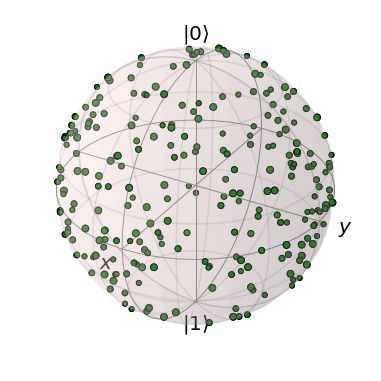

In [130]:
b = qtp.Bloch()
alpha = 0.5
b.point_marker = ['o']
for i in range(250):
    some_ket = qtp.rand_ket(2)
    b.point_color = ['g']
    b.add_states(some_ket,"point")
    
    #b.point_color = ['r']
    rho = qtp.ket2dm(some_ket)
    res = apply_channel(rho,dephasing_channel,[alpha])
    #b.add_states(res,"point")
    
b.show()

In [133]:
def ket2bloch(ket):
    '''
        Return the Bloch sphere coordinates (theta,phi) of ket
    '''
    theta = 2*np.arctan2(abs(ket[1]),abs(ket[0]))
    phi = np.angle(ket[1]/ket[0]) 
    return (theta,phi)

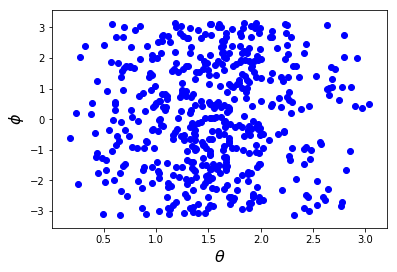

In [196]:

Q_vec = []
fidelity_vec = []

alpha = 0.95

for i in range(500):
    some_ket = qtp.rand_ket(2)
    (x,y) = ket2bloch(some_ket)
    plt.figure(1)
    plt.scatter(x,y,color='b')
    plt.xlabel(r"$\theta$",fontsize=16)
    plt.ylabel(r"$\phi$",fontsize=16)
    
    rho = qtp.ket2dm(some_ket)
    res = apply_channel(rho,dephasing_channel,[alpha])
   
    Q_vec.append(calc_entropy_diff(rho,res))
    fidelity_vec.append(qtp.metrics.fidelity(res,rho))

Text(0.5,1,'Channel paramter: $\\alpha = $ 0.95')

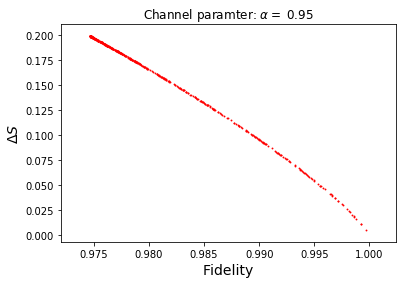

In [197]:
plt.scatter(fidelity_vec,Q_vec,color='r',s=0.75)
plt.xlabel("Fidelity",fontsize=14)
plt.ylabel(r"$\Delta S$",fontsize=14)
plt.title(r"Channel paramter: $\alpha = $ {:.2f}".format(alpha))